In [10]:
# Import essential libraries
import pandas as pd

# Load the dataset
df = pd.read_csv('heart_disease_uci.csv')

# Preview a few rows to understand the data structure
print(df.head())
print("Columns:", df.columns)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
print("\nSummary statistics:\n", df.describe())


   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  
Columns:

In [11]:
# Drop columns with high missing rates
df_clean = df.drop(['ca', 'thal', 'slope'], axis=1)


In [12]:
# Drop any remaining rows with missing values
df_clean = df_clean.dropna()

# Confirm we have a complete dataset now
print("Missing values after cleaning:\n", df_clean.isnull().sum())
print("Shape after cleaning:", df_clean.shape)


Missing values after cleaning:
 id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64
Shape after cleaning: (740, 13)


In [13]:
# Convert target to binary: 0 (healthy), 1 (has heart disease)
df_clean['target'] = df_clean['num'].apply(lambda x: 1 if x > 0 else 0)

# Check class balance
print(df_clean['target'].value_counts())


target
1    383
0    357
Name: count, dtype: int64


In [14]:
df_encoded = pd.get_dummies(df_clean, columns=['sex', 'cp', 'fbs', 'restecg', 'exang', 'dataset'], drop_first=True)

# Preview encoded features
print(df_encoded.head())


   id  age  trestbps   chol  thalch  oldpeak  num  target  sex_Male  \
0   1   63     145.0  233.0   150.0      2.3    0       0      True   
1   2   67     160.0  286.0   108.0      1.5    2       1      True   
2   3   67     120.0  229.0   129.0      2.6    1       1      True   
3   4   37     130.0  250.0   187.0      3.5    0       0      True   
4   5   41     130.0  204.0   172.0      1.4    0       0     False   

   cp_atypical angina  cp_non-anginal  cp_typical angina  fbs_True  \
0               False           False               True      True   
1               False           False              False     False   
2               False           False              False     False   
3               False            True              False     False   
4                True           False              False     False   

   restecg_normal  restecg_st-t abnormality  exang_True  dataset_Hungary  \
0           False                     False       False            False   


In [15]:
df_encoded = df_encoded.astype(int)  # This will convert all True/False to 1/0 across the DataFrame


In [16]:
print(df_encoded.dtypes)


id                          int64
age                         int64
trestbps                    int64
chol                        int64
thalch                      int64
oldpeak                     int64
num                         int64
target                      int64
sex_Male                    int64
cp_atypical angina          int64
cp_non-anginal              int64
cp_typical angina           int64
fbs_True                    int64
restecg_normal              int64
restecg_st-t abnormality    int64
exang_True                  int64
dataset_Hungary             int64
dataset_Switzerland         int64
dataset_VA Long Beach       int64
dtype: object


In [17]:
for col in df_encoded.columns:
    if df_encoded[col].dtype == 'bool':
        df_encoded[col] = df_encoded[col].astype(int)


In [18]:
# HEART DISEASE PROJECT: Exploratory Data Analysis (EDA)
# =======================================

import matplotlib.pyplot as plt
import seaborn as sns

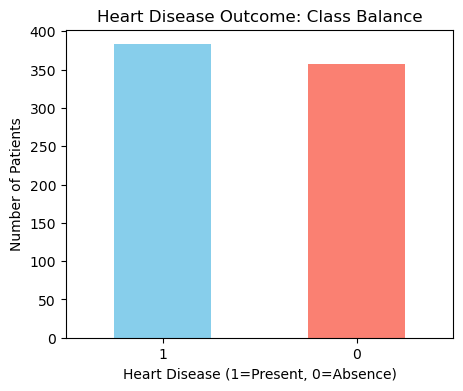

In [19]:
# --- 1. Overview: Class Balance ---
plt.figure(figsize=(5,4))
df_encoded['target'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Heart Disease Outcome: Class Balance')
plt.xlabel('Heart Disease (1=Present, 0=Absence)')
plt.ylabel('Number of Patients')
plt.xticks(rotation=0)
plt.show()

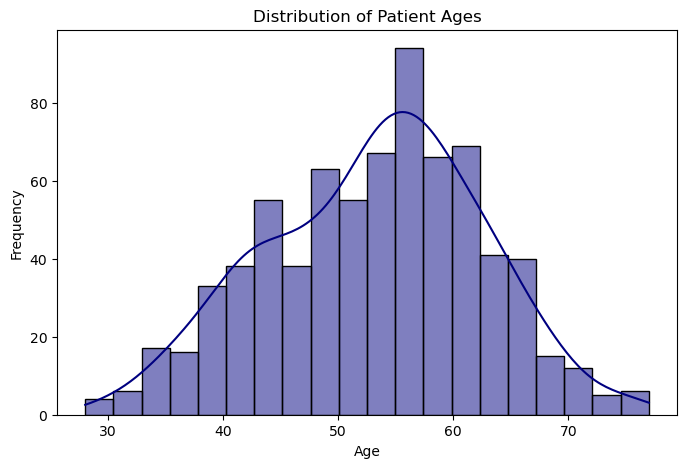

In [20]:
# --- 2. Age Distribution ---
plt.figure(figsize=(8,5))
sns.histplot(df_encoded['age'], kde=True, bins=20, color='navy')
plt.title('Distribution of Patient Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

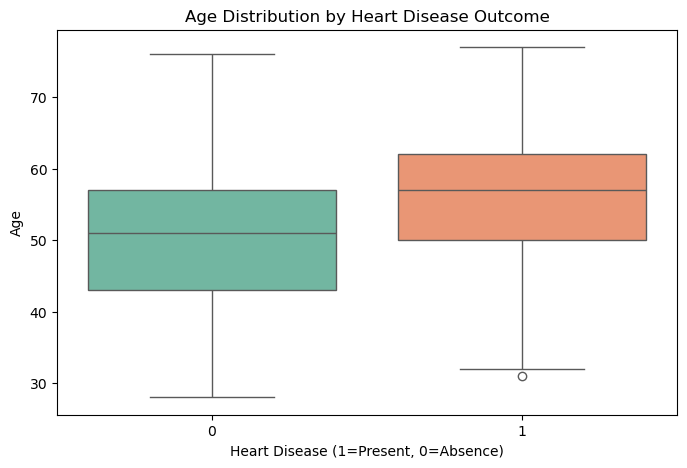

In [24]:
# --- 3. Age by Outcome ---
plt.figure(figsize=(8,5))
sns.boxplot(x='target', y='age', hue='target', data=df_encoded, palette='Set2', legend=False)
plt.title('Age Distribution by Heart Disease Outcome')
plt.xlabel('Heart Disease (1=Present, 0=Absence)')
plt.ylabel('Age')
plt.show()


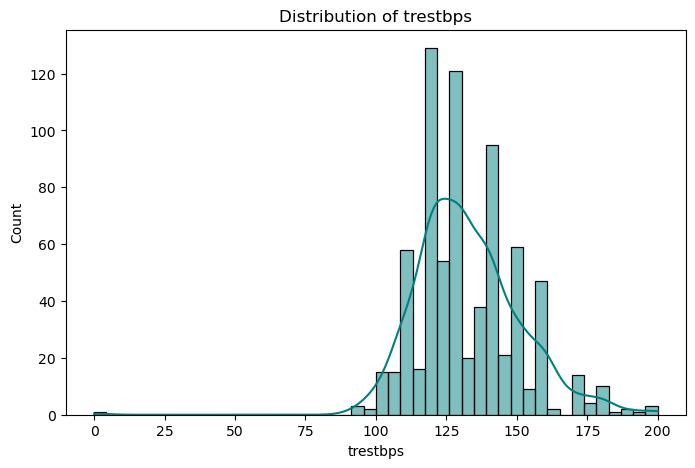

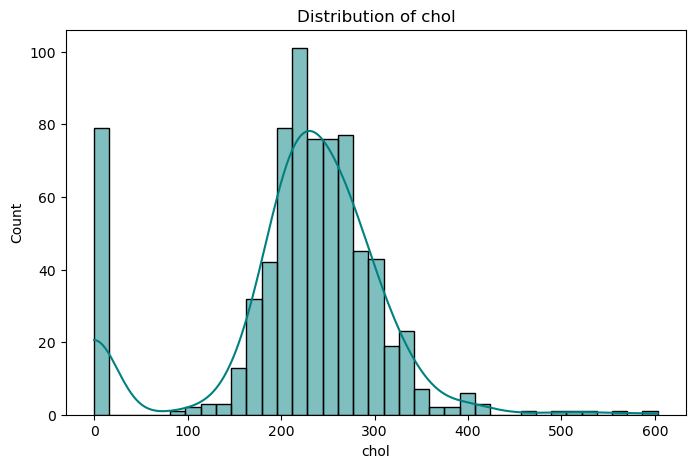

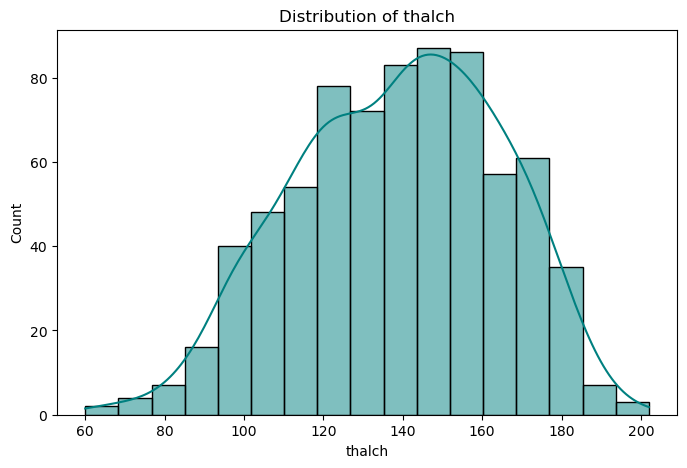

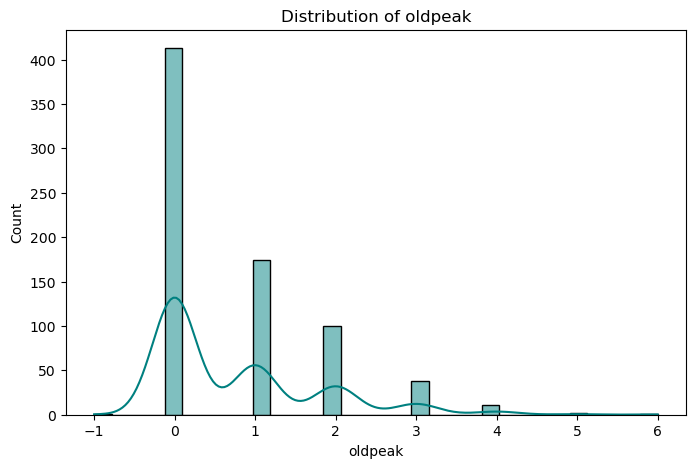

In [25]:
# --- 4. Key Feature Distributions ---
# You can loop through key continuous features
features = ['trestbps', 'chol', 'thalch', 'oldpeak']
for feat in features:
    plt.figure(figsize=(8,5))
    sns.histplot(df_encoded[feat], kde=True, color='teal')
    plt.title(f'Distribution of {feat}')
    plt.xlabel(feat)
    plt.show()

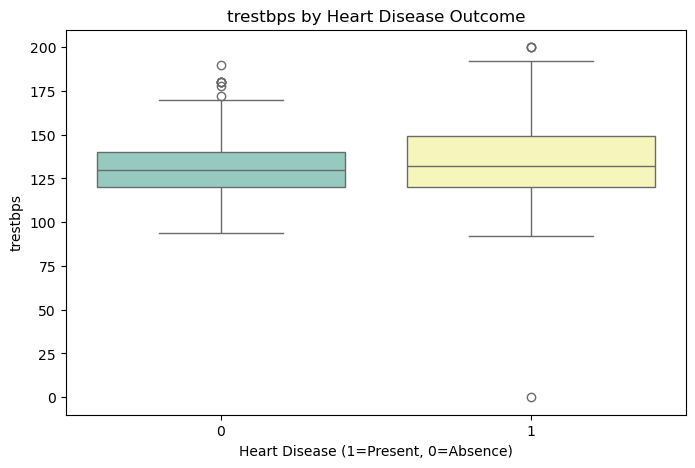

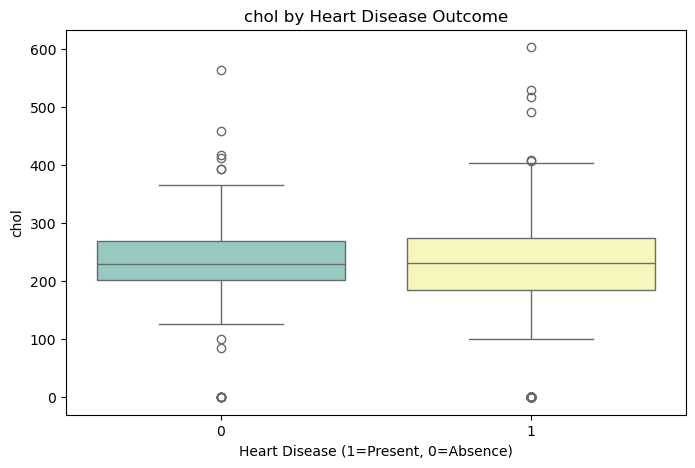

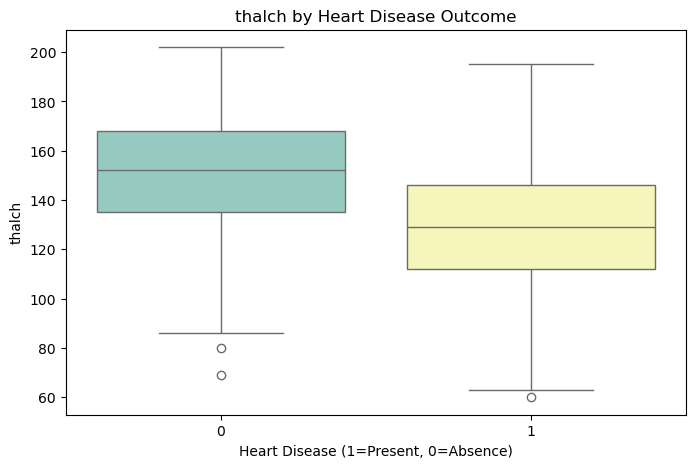

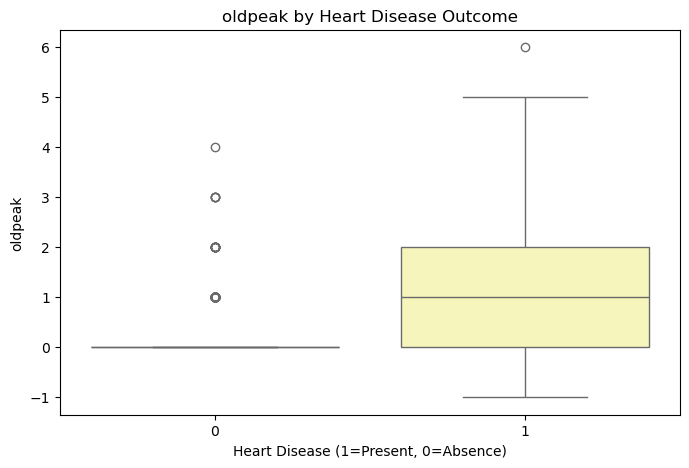

In [27]:
# --- 5. Feature vs. Target Relationships ---
for feat in features:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='target', y=feat, data=df_encoded, hue='target', palette='Set3', legend=False)
    plt.title(f'{feat} by Heart Disease Outcome')
    plt.xlabel('Heart Disease (1=Present, 0=Absence)')
    plt.ylabel(feat)
    plt.show()

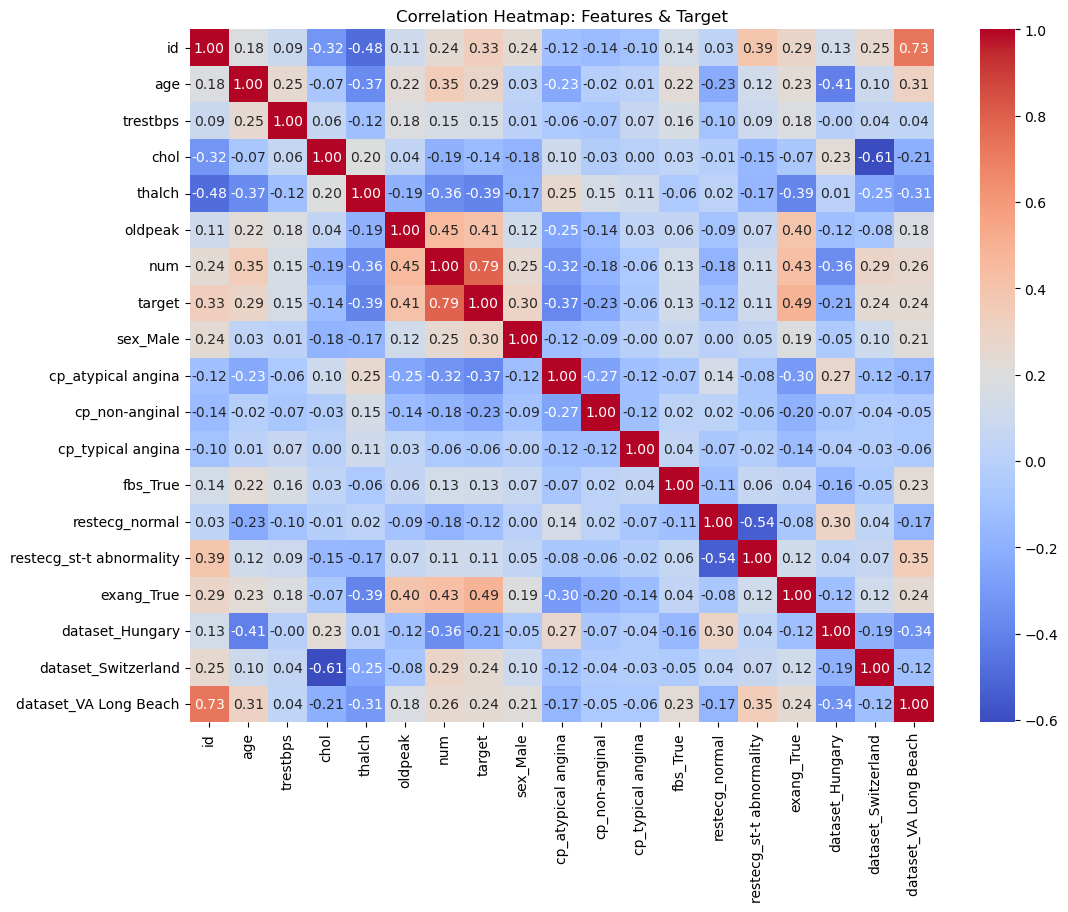

In [28]:
# --- 6. Correlation Heatmap ---
plt.figure(figsize=(12,9))
corr = df_encoded.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap: Features & Target')
plt.show()

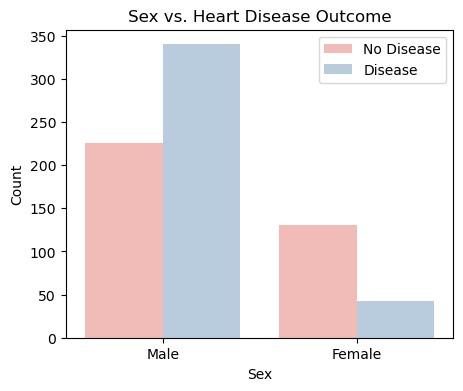

In [29]:
# --- 7. Categorical Feature Relationships ---
# Example: Sex vs. Heart Disease
plt.figure(figsize=(5,4))
sex_map = {0:'Female', 1:'Male'}
df_encoded['sex_Male'] = df_encoded['sex_Male'].map(sex_map)
sns.countplot(x='sex_Male', hue='target', data=df_encoded, palette='Pastel1')
plt.title('Sex vs. Heart Disease Outcome')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.legend(['No Disease', 'Disease'])
plt.show()
# (restore sex_Male to numeric if needed for next steps)
df_encoded['sex_Male'] = df_encoded['sex_Male'].map({'Female':0, 'Male':1})

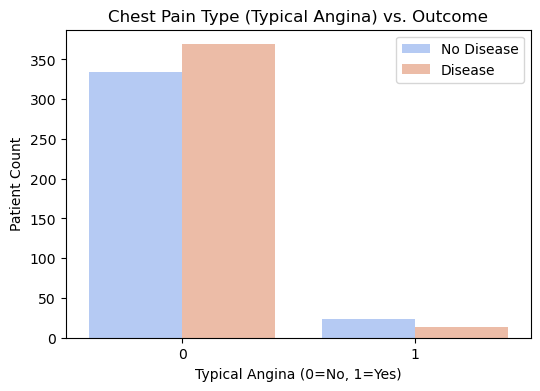

In [30]:
# --- 8. Custom: Any Categorical Feature vs. Target ---
# Adjust 'cp_typical angina', 'fbs_True', etc. as needed for your key features
plt.figure(figsize=(6,4))
sns.countplot(x='cp_typical angina', hue='target', data=df_encoded, palette='coolwarm')
plt.title('Chest Pain Type (Typical Angina) vs. Outcome')
plt.xlabel('Typical Angina (0=No, 1=Yes)')
plt.ylabel('Patient Count')
plt.legend(['No Disease', 'Disease'])
plt.show()

In [ ]:
## 4. Modeling: Data Scaling and Model Training## 4. Machine Learning Modeling: Predicting Heart Disease

In this section, we build several classification models to predict heart disease based on patient data. We'll compare results and look for the model with the most promising balance between accuracy and reliability for real-world screening.


In [34]:
# =======================================
# 4. MACHINE LEARNING MODELING
# =======================================

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target
X = df_encoded.drop(['id', 'num', 'target'], axis=1)
y = df_encoded['target']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features for models that require it (e.g., Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training samples:", X_train.shape[0], "Test samples:", X_test.shape[0])


Training samples: 592 Test samples: 148


In [ ]:
### Logistic Regression

First, we use Logistic Regression—a widely used linear classification model in healthcare risk prediction.


In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

logreg = LogisticRegression(max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))


Logistic Regression Accuracy: 0.8513513513513513
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85        71
           1       0.86      0.86      0.86        77

    accuracy                           0.85       148
   macro avg       0.85      0.85      0.85       148
weighted avg       0.85      0.85      0.85       148

Confusion Matrix:
 [[60 11]
 [11 66]]


In [ ]:
### Decision Tree Classifier

Next, we use a Decision Tree for non-linear patterns.


In [36]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))


Decision Tree Accuracy: 0.6959459459459459
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.68      0.68        71
           1       0.71      0.71      0.71        77

    accuracy                           0.70       148
   macro avg       0.70      0.70      0.70       148
weighted avg       0.70      0.70      0.70       148

Confusion Matrix:
 [[48 23]
 [22 55]]


In [ ]:
### Random Forest Classifier

Finally, we test a Random Forest—an ensemble of decision trees, often robust for tabular data.


In [37]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.7837837837837838
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        71
           1       0.79      0.79      0.79        77

    accuracy                           0.78       148
   macro avg       0.78      0.78      0.78       148
weighted avg       0.78      0.78      0.78       148

Confusion Matrix:
 [[55 16]
 [16 61]]


In [ ]:
| Model              | Accuracy | Precision (0/1) | Recall (0/1) | F1-score (0/1) |
|--------------------|----------|-----------------|--------------|----------------|
| LogisticRegression |  0.85    | 0.85 / 0.86     | 0.85 / 0.86  | 0.85 / 0.86    |
| DecisionTree       |  0.70    | 0.69 / 0.71     | 0.68 / 0.71  | 0.68 / 0.71    |
| RandomForest       |  0.78    | 0.77 / 0.79     | 0.77 / 0.79  | 0.77 / 0.79    |


In [ ]:
### Model Comparison & Interpretation

- **Logistic Regression** showed the best performance (85% accuracy), making it reliable for screening and identifying heart disease with minimal missed cases (high recall).
- **Random Forest** also performed well, suggesting more complex models may be helpful but are not guaranteed to outperform simple linear ones in this dataset.
- **Decision Tree** had the lowest performance (accuracy ~70%), with more false positives/negatives.

**Key takeaway:**  
A clinically useful model should balance precision (not wrongly labeling healthy patients as at risk) and recall (not missing true cases of heart disease). The Logistic Regression model successfully found patients at risk while minimizing errors, suggesting a linear approach is strong for this dataset. For deployment, further tuning and external validation with new data are recommended.
